In [18]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [19]:
import numpy as np
import scipy.stats as stats
from utils import Datasets, plot_density, plot_hist, plot_line
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

## Why estimate uncertainty?

In statistics / data analysis we are commonly estimating **parameters** of the population, i.e. we are estimating numerical characteristics such as the mean or the standard deviation, e.g. 

- what percentage of US voters will vote for Joe Biden?

- how satisfied are our customers with our service?

- what is the relation between body weight and exercise time?

Unfortunately, most of the time it is not feasible and/or to costly to determine these parameters directly from the population which is why we commonly deal with (representative) samples. We then estimate the parameter in question from our sample and treat it as an
**estimator** for the true population mean. 

- a sample mean is then an estimator for the population mean 

- a sample standard deviation is then an estimator for the popoulation standard deviation

- a sample proportion is then an estimator for the population proportion


 

While it is easy to make such estimate it is crucial to understand the uncertainty and the possible margin of error of this estimate. 

There exist numerous examples (e.g. in journalism) where uncertainty around an estimator is not acknowledged and it is common to only state the point estimate (or summary statistic) instead of the plausible range in which the true parameter may lie. A good example is the news about unemployment figures. Many people don't realize that these numbers commonly are an estimate based on a sample. However, in stead of stating the range the point estimate is always communicated thereby treated as if certain. 

**In research we cannot be that slopy and need to understand and determine the uncertainty associated with our estimators.**

## How to estimate uncertainty?

Once we have calculated a point estimate (e.g. the mean of a sample). How sure can we be that this estimate actually is close to the (true) mean of the population? After all, we don't have data about the enitre population, which is why we are **estimating** a statistic from a sample, instead of **calculating** a parameter from a population. 

Example:   
Let's assume we conduct a randomized controlled trial to test the effectivenss of a new drug. Our trial yields that the average outcome differs between the treamtment and the control groups. 

How do we know that this difference is large enough to state that the groups are actually different, i.e. that the drug is actually effective?

- Could this be due to chance?

- Is the difference large enough that chance cannot explain the difference?

- How large does the difference have to be that chance cannot explain the difference?


We cannot assume that the point estimator actually matches the true parameter which is why we should calculate a range of values and a probability that the true parameter is within this range. 

There are two approaches to achieve this:

1. using classical statistical concepts and probability theory

2. using simulation and intuition

In the following we will cover both approaches. Note that the first approach is usually covered in introductory statistics courses. 

# Estimating uncertainty

## Estimation of uncertainty using probability theory

### Sampling distribution

From undergraduate statistics you may recall that a sampling distribution is the distribituion of a random sample based estimate (e.g. the mean or the standard deviation). It is the distribution of estimates when taking $n$ different samples.

**Example**

We will use (fake) population data on online spending for all family households in Little Town. The data contains:

a. amount of online spending

b. indicator if family has children (1 = yes, 0 = no)



In [24]:
data = Datasets.fake_spent_children()

In [20]:
np.mean(data[:,0]), np.mean(data[:,1]), data.shape

(29809.4372, 0.633, (5000, 2))

Let's assume we are not in possession of this large data set of the enitre population and instead we only have a sample of $n=50$. We are interested in two estimators:

a. mean ($\bar{x}$) online spending

b. proportion ($p$) of families that has children

Below both parameters are estimated using a sample

In [11]:
def take_sample(data, size):
    total_rows = len(data)
    rows_smpl = np.random.choice(range(total_rows), size=size, replace=False)
    return data[rows_smpl]

In [27]:
smpl_size = 50
smpl = take_sample(data, smpl_size)
xbar, p = np.mean(smpl, axis=0)
xbar, p

(32197.22, 0.64)

Let's repeat this for $1.000$ times to create a sampling distribution. The histograms below give an approximation of the sampling distributions of both estimators. 

In [33]:
sims = 10000
estimates = np.empty((sims,2))
for i in range(sims):
    smpl = take_sample(data, smpl_size)
    estimates[i] = np.mean(smpl, axis=0)

In [41]:
means = estimates[:,0]
np.std(means)

1606.1079136941726

In [34]:
ps = estimates[:,1]
np.mean(means), np.mean(ps)

(29805.609024, 0.6341220000000001)

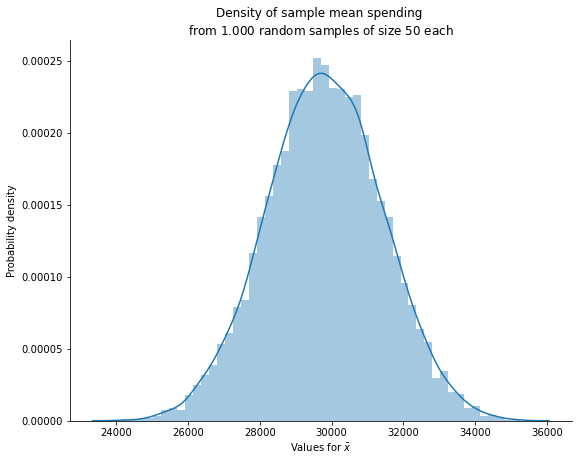

In [35]:
plot_density(means, title="Density of sample mean spending \nfrom $1.000$ random samples of size $50$ each", xlabel=r"Values for $\bar{x}$", ylabel="Probability density");

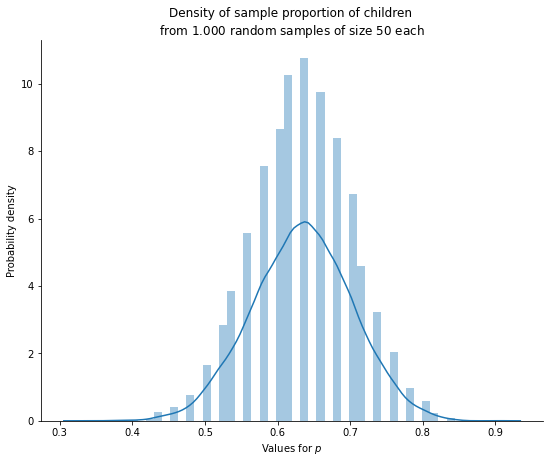

In [36]:
plot_density(ps, title="Density of sample proportion of children \nfrom $1.000$ random samples of size $50$ each", xlabel=r"Values for $p$", ylabel="Probability density");

Obviously, in practice we usually only have one sample (e.g. our sample of $5.000$ households). However, the above procedure illustrates that 

- in practice many different samples are possible

- each sample therefore generates a different estimator (as proxy for the true parameter)

Let's investigate the above sampling distributions in more detail. 

#### Expected value of $\bar{X}$

Th sampling distribution of $\bar{X}$ is the probability distribution of all possible values of the sample mean (in our case online spent). Given we are commonly only in possesssion of one sample we are interested in the mean of all possible values, the **expected value**. 

The **expected value of $\bar{X}$** is given by:

$$E(\bar{X}) = \mu$$

$\text{where}$  
$E(\bar{X}) = \text{the expected value of $\bar{X}$}$  
$\mu = \text{the mean of the population from which the sample is selected}$

You may recall from previous statistical courses that this is called an **unbiased** estimator, as the expected value of a point estimator equals the population parameter.

#### Standard deviation of $\bar{X}$

It can be shown that whenever

- the population is infinite or

- the population is finite and the sample size is less than or equal to $5\%$ of the population size ($\frac{n}{N} \leq 0.05)$

the standard deviation of $\bar{X}$ is given by:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

where

$\sigma_{\bar{x}} = \text{the standard deviation of $\bar{X}$}$  
$\sigma = \text{the standard deviation of the population}$  
$n=\text{the sample size}$  


To avoid confusion and to make the distinction between standard deviation of the population / sample and the standard deviation of a point estimate we call the latter **standard error**.

For the remainder of this course we assume that the population size is large and that the above condition holds.





The **standard error** for our example is:

In [39]:
np.std(data[:,0]) / np.sqrt(50)

1619.9906005459177

In [14]:
std_population = np.std(data[:,0])
se = std_population/np.sqrt(smpl_size)
se

1619.9906005459177

Which is fairly close to the standard devision of the sampled means

In [42]:
np.std(means)

1606.1079136941726

#### Form of the sampling distribution of $\bar{X}$

Let's consider the following two cases:

1. Population data is normally distributed

2. Population data is not normally distributed


In 1. the sampling distribution will also have a normal distribution.

In 2. the **central limit theorem** applies, i.e. with large n the sampling distribution for $\bar{X}$ also can be approximated with a normal distribution.

 
> **Recall: Central limit theorem**  
> when selecting random sample of size $n$ from a population, the sampling distribution of the sample mean $\bar{X}$ is approximated by a normal distribution as the sample size becomes large. 

Let's have a look at a few examples 

In [49]:
N, n = 10_000, 100 # size population, size sample
n_smpls = 100_000 # number of samples taken

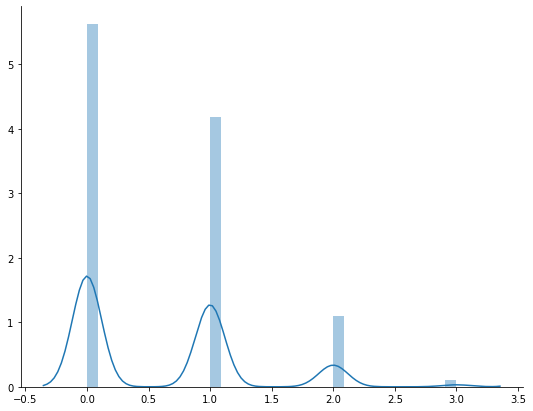

In [50]:
pop_dist = stats.binom(3,0.2).rvs(N)#stats.binom(2,2/6).rvs(N)
plot_density(pop_dist);

In [51]:
def sample_dist(dist,n, n_smpls):
    smpl = np.random.choice(dist, size=(n_smpls, n))
    return np.mean(smpl, axis=1)

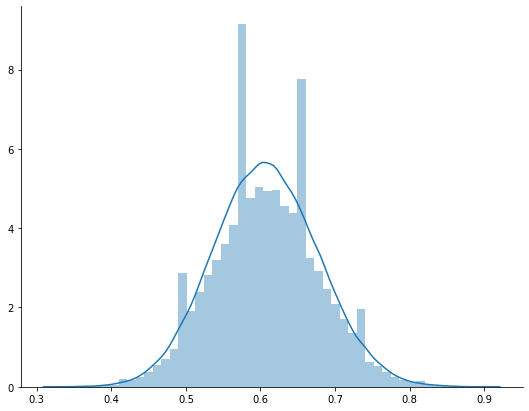

In [52]:
smpl_dist = sample_dist(pop_dist, n, n_smpls)
plot_density(smpl_dist);

#### Why do we care?

We care about the sample distribution and its properties because it provides useful information about the **difference between the sample mean and the population mean**.

**Example:** let us assume that we take the sample mean online-spent as an approximation of the population mean online-spent. However, obviously we are only accepting this approximation if we it likely that the sampled mean is close to the true mean. 

If we are willing to accept a deviation of $1.000$ from the true mean, what is the probability that the sample mean lies within a range of $1.000$ of the population mean?

We can answer this question using our sampling distributions of $\bar{X}$ by calculating a z-score (i.e. standard normalizing our sampled values) and then use the CDF of the standard normal distribution to calculate probabilities:

$$z = \frac{(x \pm \bar{x})}{\sigma_{\bar{x}}}$$

In [54]:
xbar = np.mean(take_sample(data[:,0], 50))
x = xbar - 1000 # lower bound; standard normal distribution is symetrically
zscore = (x - xbar) / se
zscore

-0.6172875322011201

In [55]:
p_low = stats.norm(0,1).cdf(zscore)
p_up = stats.norm(0,1).cdf(-zscore)

In [57]:
p_up

0.7314774555036275

In [58]:
p_up - p_low

0.46295491100725505

We see that the sample mean - given our sample size - has only a probability of $\approx 50\%$ to be within a range of $\pm 1.000$ from the population mean.

We can increase this probability by increaing the sample size given the **standard error** is a function of sample size $n$.

Let's calculate standard error and $z$ for a sample size of 300 instead. 

In [59]:
smpl_size_new = 300
std_population = np.std(data[:,0])
se = std_population/np.sqrt(smpl_size_new)
se

661.3583932403976

In [60]:
zscore = (x - xbar) / se
zscore

-1.5120394784745845

In [61]:
p_low = stats.norm(0,1).cdf(zscore)
p_up = stats.norm(0,1).cdf(-zscore)
p_up - p_low

0.8694761803235889

Increasing the sample size to 300 we increasd the probability of the sample mean being within a range of $\pm 1.000$ of the population mean. 

**Note:** analysis of $p$ will be left as an (homework) excercise for you.

### Interval estimation

Given point estimators cannot be expected to be an exact value of the true population parameter we usually determine **interval estimates**. We do so by substracting and adding **margin of error** from the point estimator. 

Let's look into more detail how this is done.

#### Population standard deviation $\sigma$ is known

Although this is usually not the case let's assume that we can reasonably derive knowledge about the population standard deviation ($\sigma$) from historical data. 

How can we then construct interval estimates?

**Interval estimate of a population mean (when $\sigma$ is known):**

$$\bar{x} \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

where

$(1-\alpha) = \text{the confidence coefficient or level}$
$z_{\alpha/2} = \text{the z value providing an area $\alpha/2$ in the upper tail of the standard normal probability distribution}$

**Example**: we take a customer survey with $80$ customers to determine customer satisfaction. 

(Let's assume that customer satisfaction follows a normal distribution with $\mu=80$ and $\sigma = 12$)

In [62]:
# Generate population data (for demonstration purposes)
mu, sig = 80, 12
customers = stats.norm(mu,sig)


In [63]:
# Take a sample and calculate the sample mean xbar
n = 80
smpl = customers.rvs(n)
xbar = np.mean(smpl)#
xbar

79.10215386868747

From our many previous customer surveys we "know" (i.e. we assume) that the standard deviation of customer satisfaction is 12. 

We want to be 95% sure that the interval estimate contains the true population mean (i.e. the true customer satisfaction score). This means that $\alpha = 5\%$ and we need to determine the $z_{\alpha/2}$, i.e. the value of the standard normal distribution where only $2.5\%$ ($\alpha/2$) are above.

We are looking for the value $z$ where `stats.norm(0,1).cdf(z)` $\approx 2.5\%$. This could be done using trial and error. However, it is easier to use the `stats.norm.ppf` function which does exactly this.

In [65]:
ci = .95
alpha = 1 - ci
z = stats.norm(0,1).ppf(alpha/2)
z

-1.959963984540054

In [66]:
se = sig/np.sqrt(n)
margin =  z*se
interval = xbar +  np.array((margin, -margin))
interval

array([76.47258625, 81.73172149])

With this interval we are 95% sure that the interval contains the true population mean. 

#### Population standard deviation $\sigma$ is unknown

In many real life cases we don't know what the population standard deviation is. If we knew we mostly wouldn't need to calculate estimates in the first place. If $\sigma$ is unknown we must use the **sample standard deviation ($s$)**. 

In this case the margin of error and the interval estimate is based on the probability distribution known as the **$t$ distribution**.


The t distribution is similar to the normal distribution. A specific t distribution depends on one parameter, the **degree of freedom**. 

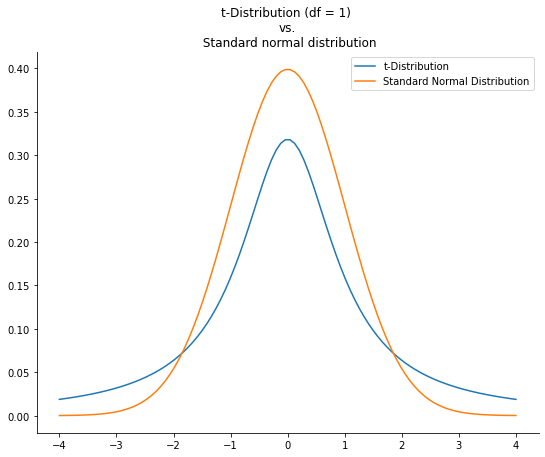

In [67]:
N = 100
df = 1 # The more degree of freedom the more t-distribution converges to normal distribution
tdist = stats.t(df=df)
norm = stats.norm()
x = np.linspace(-4,4,N)
_, ax = plot_line(x, [tdist.pdf(x), norm.pdf(x)],title=f"t-Distribution (df = {df}) \nvs.\n Standard normal distribution", zero_origin=False);
ax.legend(["t-Distribution", "Standard Normal Distribution"]);

With higher degrees of freedom the t-distribution can be approximated by the normal distribtution. Which can be shown when calculating the t and z values repectively. As a rule of thumb we can assume that with a degree of freedom of $\geq 100$ the standard normal z value provides a good approximation to the t value.

In [70]:
df = 1000
alpha = 0.025
t = stats.t(df=df)
t.ppf(alpha), stats.norm().ppf(alpha)

(-1.9623390808264078, -1.9599639845400545)

In [71]:
def show_dist(a=0.25, dist=stats.norm(), ax=None):
    # Helper function to show a distribution
    low, high = -4, 4
    x = np.linspace(low,high,1000)
    y = dist.pdf(x)
    tvalue = t.ppf(0.025)
    xlow = np.linspace(low, tvalue)
    xhigh = np.linspace(-tvalue,high)
    if ax==None: fig, ax = plt.subplots(figsize=(9,7))
    ax.plot(x,y)
    ax.fill_between(xlow,dist.pdf(xlow), color="red", alpha=0.4)
    ax.fill_between(xhigh,dist.pdf(xhigh), color="red", alpha=0.4)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_position("zero")
    return ax

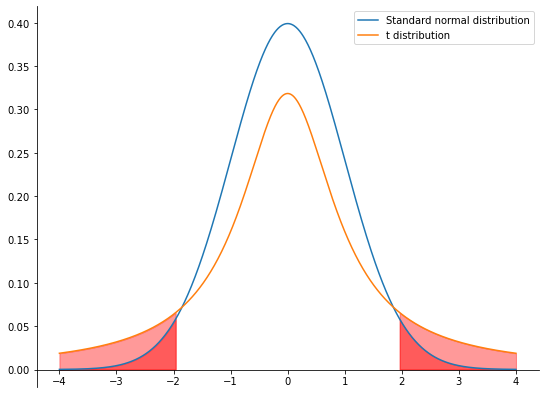

In [72]:
df = 1
ax = show_dist();
show_dist(dist=stats.t(df),ax=ax); # 
ax.legend(["Standard normal distribution", "t distribution"])

How do we calculate interval estimates?

**Interval estimate of a population mean (when $\sigma$ is unknown):**

$$\bar{x} \pm t_{\alpha/2}\frac{s}{\sqrt{n}}$$

where

$s = \text{the sample standard deviation}$  
$(1-\alpha) = \text{the confidence coefficient or level}$  
$t_{\alpha/2} = \text{the t value providing an area $\alpha/2$ in the upper tail of the (student's) t probability distribution}$

**Example**

We have conducted a study with $70$ University sutdents to estimate the mean credit card debt for a population of University students. Given we don't know anything about the population standard deviation we have to work with our sample.  

- we compute mean ($\bar{x}$) and standard deviation ($s$) of the sample ($n = 70$)  
- we then compute the margin of error and the interval estimates to determine a range of values that include the true (population) mean with a certainty of $90\%$

(Note: the sample data is fake data created using np.random)

In [78]:
smpl = Datasets.credit_card_debt(n=70)

In [79]:
xbar, s = np.mean(smpl), np.std(smpl,ddof=1)
xbar, s

(9995.962718784866, 3843.978816977805)

In [80]:
alpha = .1
n = len(smpl)
df = n - 1
t = stats.t(df).ppf(alpha/2)
t

-1.667238548542593

In [81]:
error_margin = t*s/np.sqrt(n)
ci = xbar + np.array((error_margin, -error_margin))
ci

array([ 9229.96106217, 10761.9643754 ])

With a probability of $90\%$ the true population mean of University student's credit card debt lies within the above range. 

We can see that for a rather small sample size of $n = 70$ the difference between using the standard normal distribution and the t-distribution makes a difference. The interval estimate using the standard normal distribution is tighter. 

In [82]:
def ci(data, alpha=0.05, dist="norm"):
    '''
    Calculate confidence interval for sample using standard normal distribution
    '''
    n = len(data)
    s = np.std(data, ddof=1)
    
    if dist == "norm": 
        z = stats.norm(0,1).ppf(alpha/2)
    elif dist == "t": 
        z = stats.t(len(data)-1).ppf(alpha/2)
    else:
        raise AttributeError("Dist must be either 'norm' or 't'")
    
    error_margin = z*s/np.sqrt(n)
    
    return np.mean(data) + np.array((error_margin, -error_margin))

In [83]:
ci(smpl, alpha=0.1,dist="norm"), ci(smpl, alpha=0.1, dist="t")

(array([ 9240.24566544, 10751.67977213]),
 array([ 9229.96106217, 10761.9643754 ]))

This difference becomes negigible with a larger data set. Below you can see the difference using a sample size of $n = 500$.

In [84]:
smpl = Datasets.credit_card_debt(n=500)
ci(smpl, alpha=0.1, dist="norm"), ci(smpl, alpha=0.1, dist="t")

(array([ 9837.60538399, 10403.73801795]),
 array([ 9837.0788928 , 10404.26450914]))

## Bootstrapping

So far we have been using probabilities, theory and assumptions about distributions of populations and samples to calculate estimation intervals. 

It turns out there is another (for many people more intuitive way) of calculating the above estimation intervals: **bootstrapping**.

**Intuition for bootstrapping algorithm(s):**

In theory we could see how much our sample estimator deviates from the true population parameter if we were able to draw many different sample from the population. We could then see how the sample statistic fluctuates. 

Bootstraping is build on the assumption that the sample should be a good approximation for the population (otherwise the sampling should be reconsidered because it is e.g. not representative for the population). 

Therefore, it is reasonable to create new samples by drawing from our sample. 

In doing so we can see how our estimate changes with different samples and draw conclusions from this. It turns out that this simple approach works surpringly well in many contexts. 

**Algorithm for Nonparametric bootstrap:**

Given your sample data ${\{z_i\}_{i=1}^n}$

For $b = 1 \cdots B$:

- resample *with replacement* $n$ observations ${\{z_i^{b}\}_{i=1}^n}$

- calculate your estimate ${\hat{\theta}_b}$, e.g. the mean, using the resampled set of data

then ${\{\hat{\theta}_b\}_{b=1}^B}$ is  an approximation for the sampling distribution for $\hat{\theta}$. 

Given the sample distribution we can then calculate the standard error (by calculating the standard deviation of the sample) and hence can calculate the estimate intervals.

### Example 1

Let's look at our (fake) credit debt example again.  Let's say we have a sample of $n=500$ students and we want to estimate the mean credit debt of (unknown student) population. We want to make sure that our interval estimate with a $90\%$ probabiltiy contains the population mean. 

**Traditional approach from previous chapter**

In [85]:
n = 500
smpl_original = Datasets.credit_card_debt(n)
alpha = 0.1
ci(smpl_original,alpha, dist="norm" ) # Note we use standard normal distribution given the large sample size

array([ 9837.60538399, 10403.73801795])

**Bootstrapp approach:**

In [86]:
def bootstrap(smpl, sims): 
    size_smpl = len(smpl) # size for samples drawn from original sample

    estimates = np.empty(sims)
    for i in range(sims):
        new_smpl = np.random.choice(smpl, size=size_smpl, replace=True) # Draw new sample form orginal sample
        theta = np.mean(new_smpl) # calculate estimate we want (here: mean)
        estimates[i] = theta # append to list of estimates (to save distribution)
    
    return estimates

In [87]:
n_sims = 10_000
estimates = bootstrap(smpl_original, n_sims)

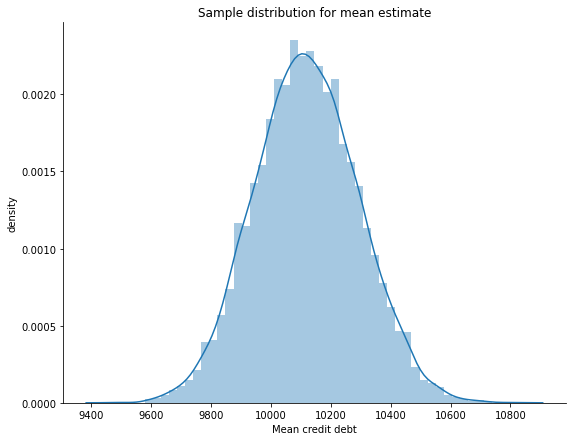

In [88]:
plot_density(estimates, title="Sample distribution for mean estimate", xlabel="Mean credit debt", ylabel="density");

We can use this distribution to calculate statistics, e.g. the standard error of our estimate by calculating the standard deviation of estimates. 

In [89]:
xbar = np.mean(estimates) # mean of our estimates (i.e. our point estimate of the true parameter)
se = np.std(estimates) # standard error of our point estimate

In [90]:
z = stats.norm().ppf(alpha/2)

In [91]:
xbar + np.array((z,-z))*se

array([ 9835.7816785 , 10403.99657339])

In [93]:
np.quantile(estimates, [0.05,0.95])

array([ 9839.9304876 , 10408.22327707])

We can see that the bootstrap algorithm is an extremely powerfull tool to estimate uncertainties associated with an estimator. 

### Example 2

**Determining estimation intervals for proportions**

In our very first example we have used online spent data and calculated two estimators:

1. mean of online spent

2. proportion of people having children. 

We then looked at 1. to show how to calculate interval estimates; in particular we needed to calculate the standard error for the mean to do this. 

In order to calculate the standard error for the proportion, you may recall from undergrad statistics, we need to apply a different formula (because we are looking to calculate the standard deviation from a binomial distributed variable). 

the standard deviation of $p$ is given by:

$$\sigma_{p} = \sqrt{\frac{(p(1-p)}{n}}$$

where

$p = \text{proportion}$   
$n = \text{the sample size}$


Using the bootsrap approch we can calculate interval estimates for the proportion directly without knowledge about the above formular given we approximate the sample distribution and can thus determine the required statistics directly.

In [ ]:
data = Datasets.fake_spent_children()
children = data[:,1]
p = np.mean(children)
p

In [ ]:
p = np.mean(children)
se = np.sqrt((p*(1-p)/n))
z = 1.645 # proxy for stats.norm.ppf(0.95)
p + z*np.array((-se,se))

In [ ]:
n_sims = 10_000
estimators = bootstrap(children,n_sims )

In [ ]:
se = np.std(estimators)
low, high = p -1.645*np.array((se,-se))
low, high

In [ ]:
_, ax = plot_density(estimators, title="Sample distribution for proportion of households with children ($p$)\n(confidence limits determined using bootstrap approach)");
ax.vlines(low, 0, 20, linestyle="--")
ax.vlines(high, 0, 20, linestyle="--")
ax.annotate(f"Lower limit {low:.4f}",(low, 22),ha="right");
ax.annotate(f"Upper limit {high:.4f}",(high, 22),ha="left");

### Example 3

**Determine confidence interval for linear regression coefficient**

We can use the bootstrap algorithm for model parameters such as regression coefficients as well. This shows the flexibility and power of using bootstrap analysis. 

We will use **advertising** data from [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) for our next example. 

For our example the data contains

- data on TV advertising spent

- sales data

We run a simle (linear) regression model of the following type:

$$\hat{y} \approx \beta_0 + \beta_1x$$

where:

$\hat{y} = $ sales data  
$x = $ tv advertising spent

We want to understand if there is a relation between money spent on tv advertising and generated sales. If not, we should stop or alter tv advertisment. In order to determine the relation we estimate $\beta_1$. 

In [94]:
data = Datasets.advertising() 
tv, sales = data[:,0], data[:,1]

We can easily calculate coefficients and additional output for regression analysis using the below "helper" function which uses special statistical packages for these purposes (we will introduce them in next lecture).

In [95]:
from utils import lreg_summary

lreg_summary(tv,sales)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        20:03:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that $\beta_1$ (denoted $x_1$) is $0.0475$ with a interval estimates of $0.042$ to $0.053$.

**Let's try to recalculate the confidence intervals for $x1$ using a bootstrap approach.**

Our estimator in this case is not the mean or a proportion but $\beta_1$ which - you may recal from undergraduate statistics - can be calculated as follows:

$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

We will have to do the following:

1. implement a function that estimates $\beta_1$

2. bootstrap $beta_1$ repeatedly to generate a distribution of sampled estimates

In [ ]:
# 1. create function for beta1
def beta1(X,Y):
    return np.sum((X - np.mean(X))*(Y-np.mean(Y))) / np.sum((X - np.mean(X))**2)

In [ ]:
# 2. bootstrap
n = len(data)
sims = 5000
betas = np.empty(sims)
for i in range(sims):
    rows = np.random.choice(range(n),n)
    X,Y = data[rows,0], data[rows,1]
    betas[i] = beta1(X,Y)

In [ ]:
plot_density(betas);

In [ ]:
# Calculate confidence interval from sample distribution
alpha = 0.05
z = stats.norm.ppf(alpha/2) # alpha is 0.05
np.mean(betas) + np.array((z,-z))*np.std(betas)

We were able to confirm the confidence intervals (although you may not recall how to actually calculate them) by using a bootstrap approach. 

While for our examples most statistical package have "out of the box" functionality, this approach gives us confidence to calculate uncertainty ranges even when using complex models or estimators where no out of the box functionality might be available.

### Conclusion

**Advantage**

- does not make strong assumptions about population or sample distributions

- often theoretical sampling distributions are not normally distributed

- is to understand without knowledge in probability theory / about probability distributions

- no knowledge about formulas for standard errors required 

**Disadvantage**

- not feasible for large samples because of computational effort 

- computational effort when sometimes a simple formular yields an answer

## Hypothesis testing

Please refer to Imai (2017), p. 342 to 362 for background information on hypothesis testing. It is generally assumed that you are familiar with hypothesis testing. 

### Examples using python

Below are some examples of how to calculate simple t-tests. We will not cover this in detail as these standard statistics are calculated by statistical packages we will be using when calculating more difficult models. 
:
To get an impression how to conduct such tests in python see below

**Two-tailed test (one sample)**

Example: It is generally assumed that stock returns on average have a daily return of $0$. 

Let's build our hypothesis:

\begin{equation} \label{eq1}
\begin{split}
& H_0: \mu = 0 \\
& H_1: \mu \neq 0 
\end{split}
\end{equation}

where:

$\mu = $ daily stock return


Let's do this in numpy from scratch. Recall that the test statistic is given by:

$$z = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$

In [ ]:
# Load Dax 30 daily data
dax = Datasets.dax_daily() # prices
ret = dax[1:] / dax[:-1] - 1 # calculate returns


In [ ]:
mu = 0 # our assumed population mean of daily returns
xbar = np.mean(ret)
n = len(ret)
se = np.std(ret,ddof=1) / np.sqrt(n)


z = (xbar - mu) / se
pvalue = (1-stats.t(len(ret) -1).cdf(t))*2 # multiply by two because it is a two-sided t-test
z, pvalue

This can also be done using `scipy.stats.ttest_..`

In [ ]:
s = 3
n = 10
s / np.sqrt(n) == np.sqrt(s**2 / n)

In [ ]:
tvalue, pvalue = stats.ttest_1samp(ret, mu) # t-statistic and pvalue
tvalue, pvalue

**Two-Sample Test**

Example: let's consider a medical trial where we have to groups the trial group (receiving a new medicine) and a control group (receiving a placebo). We now want to understand of the two groups differ regarding a specific parameter. 

Let's build our hypothesis:

\begin{equation} \label{eq1}
\begin{split}
& H_0: \mu_0 = \mu_1 \\
& H_1: \mu_0 \neq \mu_1 
\end{split}
\end{equation}

where:

$\mu = $ is e.g. the mean of a specific medical parameter (e.g. blood sugar). 


Let's implement this in python. Let's create two groups with random data both $\sim$ $N(100,10)$. A two-sample test should yield that both groups do not differ this is $H_0$ cannot be rejected. 

In [ ]:
trial_group = stats.norm(100,10).rvs(1000)
control_group = stats.norm(100,10).rvs(1000)
stats.ttest_ind(trial_group, control_group)

We can see that this is indeed the case given the pvalue of $69\%$.

### Caution with p-values

In 2016 an article in *The American Statistician* ([here](https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108)) criticized the 

"[...] widespread use of “statistical significance” (generally interpreted as “p 0.05”) as a license for making a claim of a scientific finding (or implied truth) leads to considerable distortion of the scientific process."

Unfortunately, this practice is still quite common in research. It should be noted that research does not mean "finding effects with a p-value below 5%". While there is nothing wrong or false about the concept of p-values it is sometimes misused. 

This is due to several reasons:

a. p value tends to decrease with largers samples, i.e. the larger the sample the higher the probability of finding a "significant effect" (ceteris paribus)

b. focus is too much on identifying signficiance while confirming the null hypothesis should actually be considered as a finding as well. Instead behaviors termed "p-hacking" becomes common ([see here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.590.4360&rep=rep1&type=pdf))

c. focus on one value is misleading; instead at least ranges should be reported; at best additional tests and indication for confirmation of research hypotheses should be provided. 

d. statistical significance is often confused with practical relevance 



**Why p value may be misleading given a large sample size**

Strategy of p value hacking is dangerous and may lead to wrong research findings. 

In the following we will see that larger samples may lead to statistical effects although the practical relevance of theses statistical significant findings are practically irrelevant. 

Let's consider the following example (from Daniela Witten): 

- we are testing whether a mean of a random varialbe $X \sim N(0,1)$ is equal to $0$

- we draw a sample and find that the mean ($\bar{x}$) is slightly different from 0 (e.g. 0.000001)

- Practically we can conclude for (almost all) practical research hypothesis that $H_0$ can be confirmed and that the mean of a sample is $0$. 

- However, depending on the size of your sample correctly calculated p-value of your estimator will actually indicate rejection of said hypothesis. 

Let's look at an example:

Given a large sample size we can use the normal distribution and the z-value to test for significance. 

Recall that the test statistic is given by:

$$z = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$

As per our assumption 

- $s$ will be 1

- $\mu_0$ will be zero

This gives us:

$$z = \bar{x}*\sqrt{n} = 0.000001 * \sqrt{n}$$

If the sample size is big (e.g. $10^6$) - which in the age of big data cannot be considered an exception anymore - the z value will become very big (yielding a low p-value) and leads to the conclusion that $H_0$ needs to be rejected. 

However, for all practical reasons $\bar{x}$ is very close to zero and we only observe this finding given the large sample size. 

In [ ]:
n = 10e6
xbar = 0.000001
zvalue = n*xbar
zvalue

In [ ]:
pvalue = 1 - stats.norm(0,1).cdf(zvalue)
pvalue

This does not mean that p-values are wrong. Statistically speaking the result is correct. However, it should be noted that with large sample size we are to see statistical effects that may in fact no indicate practical findings given the deviance from $H_0$ is negligible.  